# Obesity In The Philippines

The Philippines has consistently been ranked [below average](https://today.mims.com/philippines-one-of-the-unhealthiest-countries-in-asia) on the Healthy living Index Scale as conducted by the Philam Life. Wherein that study, over 80% of Filipinos are not generally satsified with their health, 52% of the adults are addicted to their mobile phones, as well as children not getting enough excercise and sleep (30% and 22% respectively). The unhealthy living lifestyle of the Filipinos has led up to over 18 million obese and overweight people, as suggested in this [study](https://businessmirror.com.ph/obese-filipinos-now-ballooning/). 

In 2015, the Food and Nutrition Research Institute (FNRI), conducted a  nutrition survey, where they get the dietary and physical characteristics of the Filipino, and here is what they've found:
  
   - On all categories, from preschool children to adults, there have been significant increasing trends with the obesity rate.
   - A significant amount of the obese and overweight Filipinos have come from urban areas.
    
This study will be focusing about the Filipino diet and how this has affected the obesity rate in the Philippines.

# How Does One Gain Weight?

Before going onto explain why food makes a person gain weight, there are actually several [causes](https://www.eatthis.com/why-gaining-weight-so-fast/) that can contribute to obtaining more pounds, such as: age, a passive thyroid, depression, medication, sleeping late at night, stress and many others. These causes as well as having unhealthy eating habits can definitely increase the rate of gaining weight.

Now, how does food make you gain weight?

Everything we eat has [calories](https://kidshealth.org/en/kids/calorie.html), and they are responsible for giving us energy to do work. They can be taken from multiple sources such as carbohydrates, fat, and sugar. When food has been ingested, the energy will then be absorbed by the body, however any excess calories will then be turned into [fat](https://www.sgutmx.com/blogs/news/how-does-your-body-store-excess-calories) which will be used later when the body needs it.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import clear_output

plt.style.use("seaborn")
%matplotlib inline

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
df = pd.read_csv("data/commonly_consumed.csv")

# How Has The Philippines Been Doing?

The dataset being used came from The Top 30 commonly eaten food on both surveys, [2008 and 2013](http://www.fnri.dost.gov.ph/index.php/national-nutrition-survey#facts-and-figures). There are added features to the dataset, namely: High Sugar, High Fat, High Salt, and Processed/Whole. [High Sugar](http://www.coachmag.co.uk/nutrition/6781/does-sugar-make-you-fat-it-sure-does-here-s-how), High Fat, and [High Salt](https://www.menshealth.com/nutrition/a19533654/how-salt-adds-fat/), have been added to the dataset since there have been several studies that have shown that eating too much of these nutrients can gain weight may it come from increased appetite, or losing the sense of fullness. Lastly, the Processed/Whole feature is a parameter that checks if the food item is either a whole food, or a highly processed food (convenience food), since a [study](https://www.forbes.com/sites/alicegwalton/2015/02/27/yes-food-makes-us-fat-but-science-provides-two-new-clues-as-to-why/#3de6c96c1859), shows that heavily processed food makes you more addicted and thus making consumers more susceptible to weight gain.

For this section, discussion toward the general consumption of food as well as the number of people and the frequency of consumption of the food item will be tackled.

In [3]:
# Make dictionaries and a function to properly plot out graphs

# made a dictionary between food item and processed food
item_processed_dict = pd.Series(df["Processed/Whole"].values, index = df["Food Item"]).to_dict()

#dictionary to find out which color is for processed and for whole
colors = {"Processed": "seagreen", "Whole": "gold"}

#function to map out processed food to their respective color
def food_color(food_list):
    processed_foodlist = [item_processed_dict[food] for food in food_list]

    return [colors[i] for i in processed_foodlist]

#define a function to return the ratio and % symbol onto pie graph
def func(pct):
    return "{:.2f}%".format(pct)

In [4]:
#data for graph 1, ax1
# get all food items present in all age groups and survey years
present_all = df[df["Food Item"].isin(df["Food Item"].value_counts()[df["Food Item"].value_counts() == 10].index)]
present_all = present_all.drop_duplicates("Food Item")

present_all = present_all["Processed/Whole"].value_counts()
present_all = [present_all[i] for i in range(len(present_all))]
 
#data for graph 1, ax2
unique_food = df.drop_duplicates(subset = "Food Item")
processed_food = unique_food["Processed/Whole"].value_counts() 

processed_count = [processed_food[i] for i in range(len(processed_food))]
label = processed_food.index.tolist()

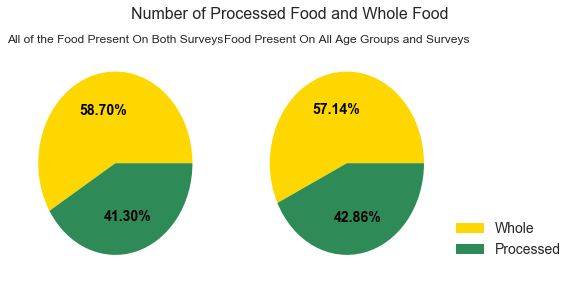

In [5]:
#graph1
fig, [ax1, ax2]  = plt.subplots(ncols =2, nrows =1, figsize = (8, 4))

wedges, texts, autotexts = ax1.pie(processed_count, autopct = lambda pct: func(pct)
                                  , colors = ["gold", "seagreen"], textprops=dict(color="black"))
ax1.set_title("\n\nAll of the Food Present On Both Surveys", fontsize = 12)
plt.setp(autotexts, size=14, weight="bold")

wedges, texts, autotexts = ax2.pie(present_all, autopct = lambda pct: func(pct)
                                  , colors = ["gold", "seagreen"], textprops=dict(color="black"))
ax2.set_title("\n\nFood Present On All Age Groups and Surveys", fontsize = 12)
ax2.legend(wedges, ["Whole", "Processed"], bbox_to_anchor = (1, 0.3), fontsize = 14)
plt.setp(autotexts, size=14, weight="bold")

fig.suptitle("Number of Processed Food and Whole Food", fontsize = 16)
fig.tight_layout()

clear_output()

The 1st graph, having 46 different kinds of foods, 19 of which are highly processed and have a high amount of sugar, salt, and fat. The large amount of highly processed foods, show why there's a lot of Filipinos that are obese. 

Also, the second graph shows similar behavior with the first. This graph has a total of 14 food items, with 6 of them being highly processed (bread, sugar, cooking oil, softdrinks, and coconut cream). One of the causes for the high amount of the consumption of processed foods is because of its affordability and its convenience.

Now let's look at the top 10 consumed food, as ranked by the FNRI:

In [6]:
#graph 3 and 4
#data for both graphs
top10_food = df.groupby("Food Item")["Percent consuming out of total subjects"].apply(lambda x: x.median()).sort_values(ascending = False).head(10).index.tolist()

general_analysis = df[df["Food Item"].isin(top10_food)]
general_analysis = general_analysis.groupby("Food Item")

general_consumption = general_analysis["Percent consuming out of total subjects"].apply(lambda x: x.median()).sort_values(ascending = False)
general_frequency = general_analysis["Frequency of Consumption in a Day"].apply(lambda x: x.median()).sort_values(ascending = False)

x = np.arange(len(general_consumption))
y_consumption = [general_consumption[i] for i in range(len(general_consumption))] 
y_frequency = [general_frequency[i] for i in range(len(general_frequency))]

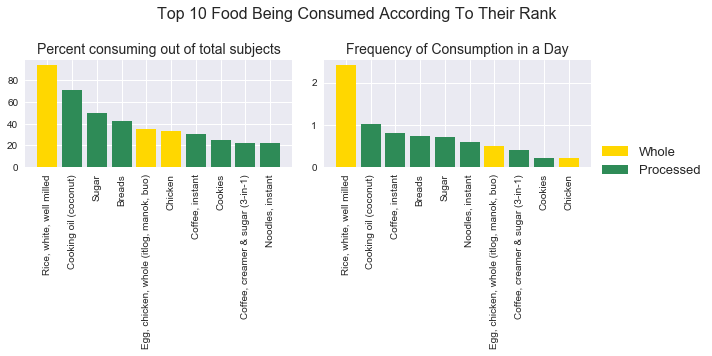

In [7]:
#graph 3 and 4
fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))

ax1.bar(x, y_consumption, color = food_color(general_consumption.index.tolist()))
ax1.set_xticks(x)
ax1.set_xticklabels(general_consumption.index.tolist(), rotation = "vertical")
ax1.set_title("\n\nPercent consuming out of total subjects", fontsize = 14)


container = ax2.bar(x, y_frequency, color = food_color(general_frequency.index.tolist()))
ax2.set_xticks(x)
ax2.set_xticklabels(general_frequency.index.tolist(), rotation = "vertical")
ax2.set_title("Frequency of Consumption in a Day", fontsize = 14)

ax2.legend(container, ["Whole", "Processed"], fontsize = 13, bbox_to_anchor = (1, 0.3))
fig.tight_layout()
fig.suptitle("Top 10 Food Being Consumed According To Their Rank", fontsize = 16)

clear_output()

Although the previous graph showed that there are more whole foods being consumed, this graph shows otherwise. 7 out of 10 here are processed food, this explains why there have been more people, below the poverty line, getting obese since a lot of these products are higly affordable. 

Both graphs tells us that rice is still the staple food in the Philippines. People are highly dependent on it since rice, can easily be mixed with any viand as well as any instant food, e.g. instant noodles. Cooking oil, being the second rank on both graphs, since the vast amount of street food vendors and fast food chains, selling fried food everywhere in the country. Lasty, a lot of people are frequently consuming sugar and this is because of Filipinos love their food sweet with bananas being coated with sugar, and chicken adobo sprinkled with sugar as some of the examples. 

Next, let's take a look on the food products which have high amounts of fat, salt, and sugar.

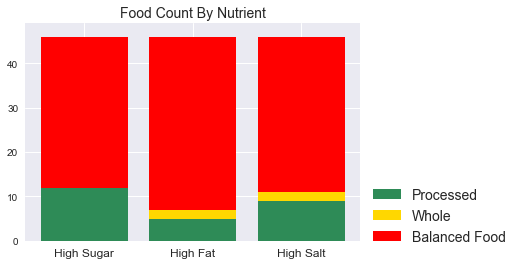

In [8]:
#graph 5
#use unique_food dataframe since all duplicates have been removed
#filter out all yes answers on high nutrient categories
high_sugar = unique_food[unique_food["High Sugar"] == "Yes"]
high_fat = unique_food[unique_food["High Fat"] == "Yes"]
high_salt = unique_food[unique_food["High Salt"] == "Yes"]

#place all processed yes nutrients into a single array
processed_yes = [12, 5, 9]
#place all whole yes nutrients into a single array
whole_yes = [0, 2, 2]
#place all no variables
no = [len(unique_food) - x - y for x, y in zip(processed_yes, whole_yes)]

#produce a bar graph where whole nutrients are being placed up
position = np.arange(3)

fig, ax = plt.subplots(figsize = (6, 4))

container1 = ax.bar(position, processed_yes, color = "seagreen")
container2 = ax.bar(position, whole_yes, color = "gold", bottom = processed_yes)
container3 = ax.bar(position, no, color = "red", bottom = np.array(whole_yes) + np.array(processed_yes))

ax.set_xticks(position)
ax.set_xticklabels(["High Sugar", "High Fat", "High Salt"], fontsize = 12)
ax.set_title("Food Count By Nutrient", fontsize = 14)

ax.set_ylim([0, len(unique_food) + 3])

ax.legend((container1, container2, container3), ["Processed", "Whole", "Balanced Food"], bbox_to_anchor = (1, 0.3), fontsize = 14)

clear_output()

The chart shows that a lot of the whole foods are actually balanced. However, the problem is that most Filipinos are more likely to eat processed food than whole food, as shown on the previous graph. This would consequently make them more prone to eating too much fat, salt, or sugar than the recommended daily nutritional value.

# What Has Changed?

From the previous section, we know that:
   - Filipinos eat more whole food than processed food.
   - However, by looking at the % consumption of people and frequency, people are more likely to eat processed  food than whole food. 
   - Looking at the food count by its nutrient, most are balanced food. Nonetheless, since people are more likely to eat processed, consequently they have higher chances of eating food high in fat, salt, or sugar.
   
With that being said, let's take a look at the change in diet from 2008 and 2013.

In [9]:
#used to find any change 
#filter out survey years
survey_2008 = df[df["Survey Year"] == 2008].set_index("Age Group")
survey_2013 = df[df["Survey Year"] == 2013].set_index("Age Group")

In [10]:
#remove all non-unique variables in Food Item
unique_2008 = survey_2008.drop_duplicates("Food Item")
unique_2013 = survey_2013.drop_duplicates("Food Item")

In [11]:
#preparing data for graph 1
generation = df["Age Group"].unique().tolist()

processed_2008 = []
processed_2013 = []

for food_processed, survey in zip([processed_2008, processed_2013],[survey_2008, survey_2013]):
    for gen in generation:
        food_processed.append(survey.loc[gen]["Processed/Whole"].value_counts()[0])
        
whole_2008 = []
whole_2013 = []

for food_whole, survey in zip([whole_2008, whole_2013],[survey_2008, survey_2013]):
    for gen in generation:
        food_whole.append(survey.loc[gen]["Processed/Whole"].value_counts()[1])

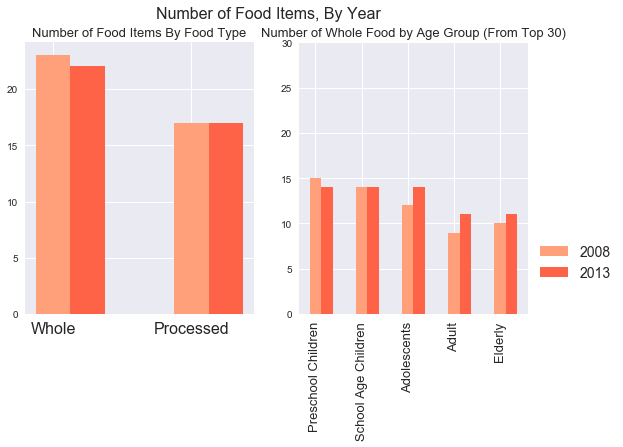

In [12]:
#graph1
#set arrays
count_2008 = unique_2008["Processed/Whole"].value_counts()
count_2013 = unique_2013["Processed/Whole"].value_counts()

#assume the position
position = np.arange(2)
width_buffer = 0.25

y_2008 = [count_2008[i] for i in range(2)] 
y_2013 = [count_2013[i] for i in range(2)] 

fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize = (9, 5))

#1st graph

container1 = ax1.bar(position, y_2008, width = width_buffer, color = "lightsalmon")
container2 = ax1.bar(position + width_buffer, y_2013, width = width_buffer, color = "tomato")

ax1.set_xticks(position)
ax1.set_xticklabels(["Whole", "Processed"], fontsize = 16)
ax1.set_title("Number of Food Items By Food Type", fontsize = 13)

#2nd graph
x = np.arange(len(generation))
width_buffer = 0.25

y1 = whole_2008
y2 = whole_2013

ax2.bar(x, y1, width = width_buffer, color = "lightsalmon")
ax2.bar(x + width_buffer, y2, width = width_buffer, color = "tomato")

ax2.set_xticks(x)
ax2.set_xticklabels(generation, rotation = "vertical", fontsize = 13)
ax2.set_ylim([0, 30])
ax2.set_title("Number of Whole Food by Age Group (From Top 30)", fontsize = 13)

ax2.legend((container1, container2), ["2008", "2013"], bbox_to_anchor = (1, 0.3), fontsize = 14)

fig.suptitle("Number of Food Items, By Year", fontsize = 16)

clear_output()

The 1st graph doesn't show any conslusive implications, with only a 1 less whole food being eaten in 2013 as compared to 2008. However, the next graph shows a downward trend on both years, which suggests that the older you are, the more likely it is for you to eat processed food. Another possible explanation for the downward trend is that for adolescents, fast food chains are near schools, then for adults, since they have very little time to prepare food, they tend to eat at convenience stores or food chains. Lastly, the graph shows that only 50% is the maximum ratio between whole food and processed food which is very alarming. 

Let's examine the change of the number of consumers eating whole vs processed food.

In [13]:
#ax1 data
percent_consumption_2008 = survey_2008.groupby("Processed/Whole")["Percent consuming out of total subjects"].apply(lambda x: x.median())
percent_consumption_2013 = survey_2013.groupby("Processed/Whole")["Percent consuming out of total subjects"].apply(lambda x: x.median())

In [14]:
#ax2 data
#processed food
consumption_gen_2008_pro = []
consumption_gen_2013_pro = []

for consumption_gen, survey_year in zip([consumption_gen_2008_pro, consumption_gen_2013_pro],[survey_2008, survey_2013]):
    for gen in generation:
        consumption_gen.append(survey_year.loc[gen].groupby("Processed/Whole")["Percent consuming out of total subjects"].apply(lambda x: x.median())[0])

#whole food
consumption_gen_2008_who = []
consumption_gen_2013_who = []

for consumption_gen, survey_year in zip([consumption_gen_2008_who, consumption_gen_2013_who],[survey_2008, survey_2013]):
    for gen in generation:
        consumption_gen.append(survey_year.loc[gen].groupby("Processed/Whole")["Percent consuming out of total subjects"].apply(lambda x: x.median())[1])

In [15]:
#ax3 data
frequency_consumption_2008 = survey_2008.groupby("Processed/Whole")["Frequency of Consumption in a Day"].apply(lambda x: x.median())
frequency_consumption_2013 = survey_2013.groupby("Processed/Whole")["Frequency of Consumption in a Day"].apply(lambda x: x.median())

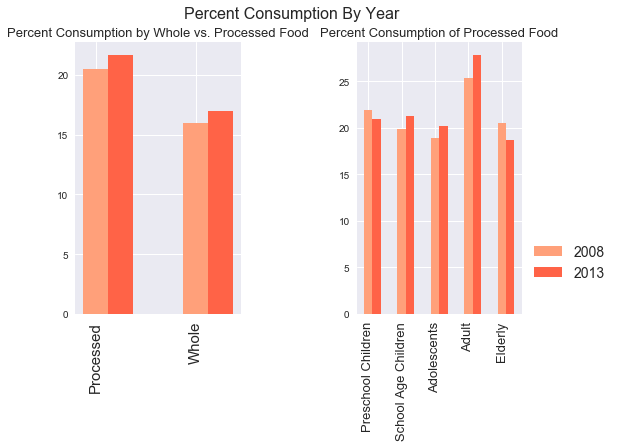

In [23]:
#delta in frequency consumption and ppercent consumption
#preparing data for ax1
x1 = np.arange(2)
width_buffer = 0.25

consumption_2008 = [percent_consumption_2008[i] for i in range(2)]
consumption_2013 = [percent_consumption_2013[i] for i in range(2)]

#preparing data for ax2
x2 = np.arange(len(generation))

#preapring data for ax3
frequency_2008 = [frequency_consumption_2008[i] for i in range(2)]
frequency_2013 = [frequency_consumption_2013[i] for i in range(2)]

#actual graph
fig, ([ax1, ax2]) = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 5))

#ax1
ax1.bar(x1, consumption_2008, width = width_buffer, color = "lightsalmon")
ax1.bar(x1 + width_buffer, consumption_2013, width = width_buffer, color = "tomato")

ax1.set_xticks(x1)
ax1.set_xticklabels(["Processed", "Whole"], fontsize = 15, rotation = "vertical")
ax1.set_title("Percent Consumption by Whole vs. Processed Food", fontsize = 13)

#ax2
ax2.bar(x2, consumption_gen_2008_pro, width = width_buffer, color = "lightsalmon")
ax2.bar(x2 + width_buffer, consumption_gen_2013_pro, width = width_buffer, color = "tomato")

ax2.set_xticks(x2)
ax2.set_xticklabels(generation, rotation = "vertical", fontsize = 13)
ax2.set_title("Percent Consumption of Processed Food", fontsize = 13)

ax2.legend((container1, container2), ["2008", "2013"], bbox_to_anchor = (1, 0.3), fontsize = 14)

#fix up titles
fig.suptitle("Percent Consumption By Year", fontsize = 16)
fig.subplots_adjust(wspace = 0.7)
clear_output()

The graph complements well, with the previous one. Adults, are more likely to eat processed food as compared to other age groups. Even on most age groups, eating processed food has increased (2nd graph). Also, there are a lot more people eating processed food on both years, as shown on the 1st graph, which holds well to the fact that processed foods are affordable and easily consumable.

With this being said, let's take a look at the changes in high fat, salt, and sugar foods to find out if there have been any trends to be seen.

In [17]:
#graph2
#fat, salt, sugar

nutrient_2008 = []
nutrient_2013 = []

for nutrient_year, survey_year in zip([nutrient_2008, nutrient_2013], [survey_2008, survey_2013]):
    for nutrient in ["High Fat", "High Salt", "High Sugar"]:
        nutrient_year.append(survey_year[nutrient].value_counts()[1])

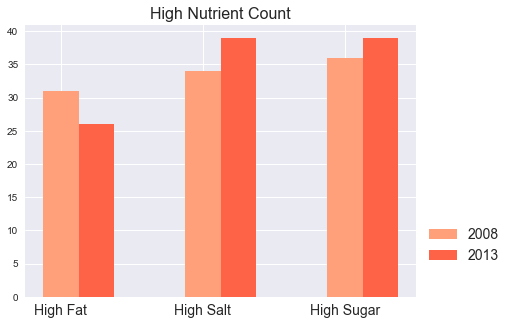

In [18]:
#graph
x = np.arange(3)
width_buffer = 0.25

fig, ax = plt.subplots(figsize = (7, 5))

ax.bar(x, nutrient_2008, width = width_buffer, color = ["lightsalmon"])
ax.bar(x + width_buffer, nutrient_2013, width = width_buffer, color = "tomato")

ax.set_xticks(x)
ax.set_xticklabels(["High Fat", "High Salt", "High Sugar"], fontsize = 14)
ax.legend((container1, container2), ["2008", "2013"], fontsize = 14, bbox_to_anchor = (1, 0.3))
ax.set_title("High Nutrient Count", fontsize = 16)

clear_output()

The graph shows, that the causes of high obesity rate is the large intake of salt as well as sugar. Most likely because companies have already made a large variety of cheap baked goods (bread, cakes), chips, instant noodles and coffee accesible to the consumers. 

# What's Next?
Obesity rates in the Philippines have been increasing since the 90's, which can be attributed to the afforable prices of convenience food (e.g. instant noodles, microwavable sisig), and also the expanding number of food chains across the streets. Within 5 years, from 2008 to 2013, even though people have eaten less fatty foods, they have greatly increased their salt and sugar intake. 
        
### Recommendations
#### Junk Food Taxes
   An article from [Vox](https://www.vox.com/2018/1/17/16870014/junk-food-tax), which showed how taxing foods that have high doses of fat, salt, or sugar, and from the research, it showed to have lessened junk food consumption by over 7%. Also, taxing have the greatest effect from low income groups, which is great since this group is the most likely to consume processed food. Lastly, researchers from American Journal Public Health Paper, have found out that because of taxing the "unhealthy food", over 40% of manufacturers have tweaked their formula to make them healthier. 

#### Zoning Fast Food Chains
   A [study](http://www.nber.org/aginghealth/2009no1/w14721.html) made by Janet Currie, Stefano DellaVigna, Enrico Moretti, and Vikram Pathania which tried to find the relationship of fast food proximity and obesity. In their study, they found out that for children, fast food restaurants within 0.10 miles have increased probability of obesity by 5%. So by giving a range of fast food chains not being close to a school or an establishment, it can significantly decrease the probability of overweight/obese people. 